In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler




In [3]:
# Load dataset
df = pd.read_csv('fruit.csv')
df.head()

,label,ph,temperature,humidity,altitude,rainfall,N,P,K
0,Almond,6.43,27.41,50.10,486,582.53,45,47,83
1,Almond,7.11,18.26,53.39,1108,509.42,105,41,69
2,Almond,6.45,29.09,51.00,268,486.98,74,26,90
3,Almond,7.41,17.50,56.40,973,551.17,97,26,70
4,Almond,7.36,16.31,48.97,903,950.01,63,30,113


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18200 entries, 0 to 18199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   label        18200 non-null  object 
 1   ph           18200 non-null  float64
 2   temperature  18200 non-null  float64
 3   humidity     18200 non-null  float64
 4   altitude     18200 non-null  int64  
 5   rainfall     18200 non-null  float64
 6   N            18200 non-null  int64  
 7   P            18200 non-null  int64  
 8   K            18200 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 1.2+ MB


In [4]:
# Check for missing values
df.isnull().sum()

label          0
ph             0
temperature    0
humidity       0
altitude       0
rainfall       0
N              0
P              0
K              0
dtype: int64

In [ ]:
df.columns

In [ ]:
df.shape

In [ ]:
df['label'].unique()

In [ ]:
df['label'].value_counts()

In [ ]:
df.describe()

Statistical plots for: ph


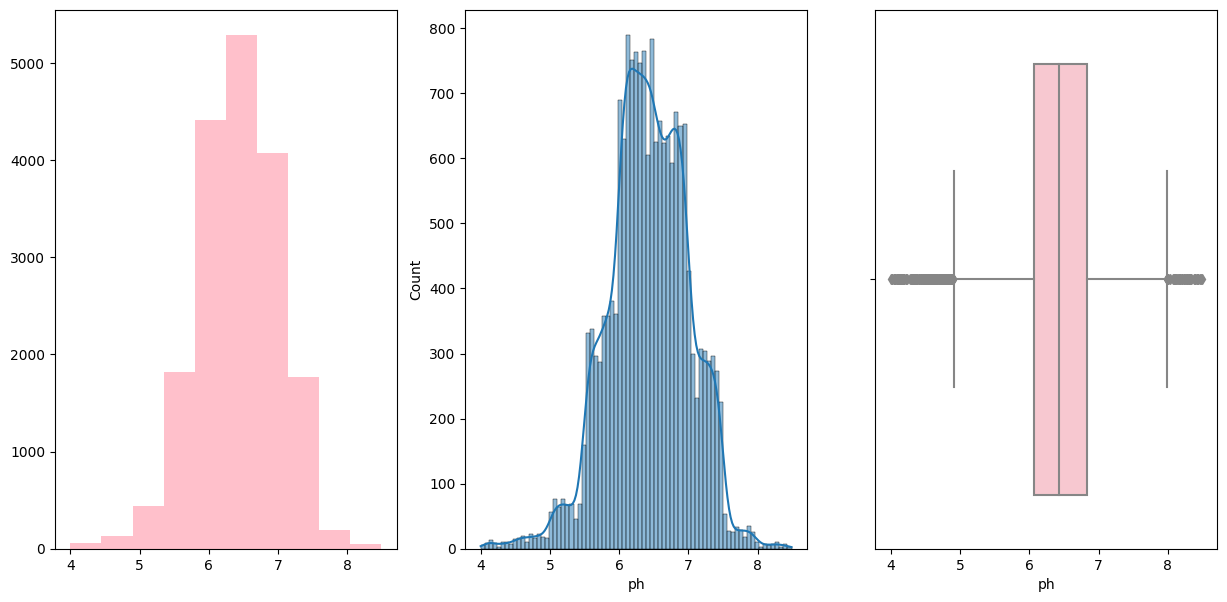

------------------------------------------------------------
Statistical plots for: temperature


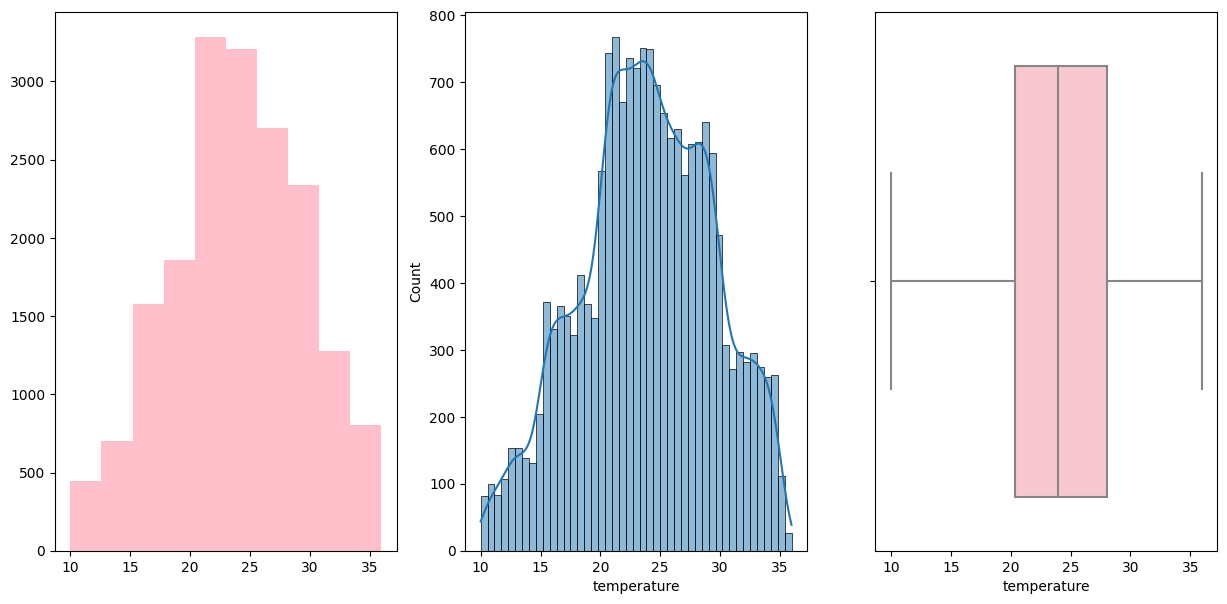

------------------------------------------------------------
Statistical plots for: humidity


KeyboardInterrupt: 

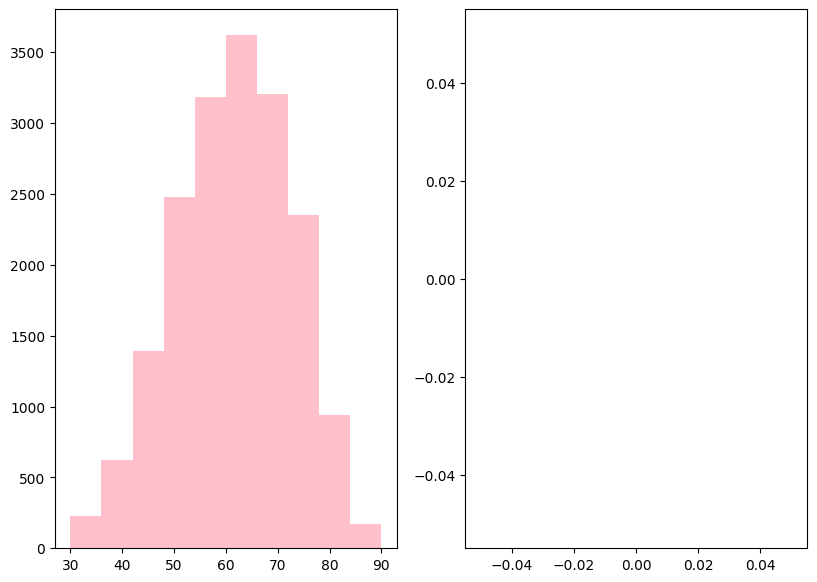

In [5]:
# Visualize data distribution and characteristics
def visualize(df, col):
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 3, 1)
    plt.hist(df[col], color='pink')

    plt.subplot(1, 3, 2)
    sns.histplot(df[col], kde=True)

    plt.subplot(1, 3, 3)
    sns.boxplot(x=df[col], color='pink')

    plt.show()

for col in df.columns[:-1]:  # Exclude the last column, assumed to be 'label'
    if col != 'label':
        print(f'Statistical plots for: {col}')
        visualize(df, col)
        print("-" * 60)


<Axes: xlabel='label', ylabel='count'>

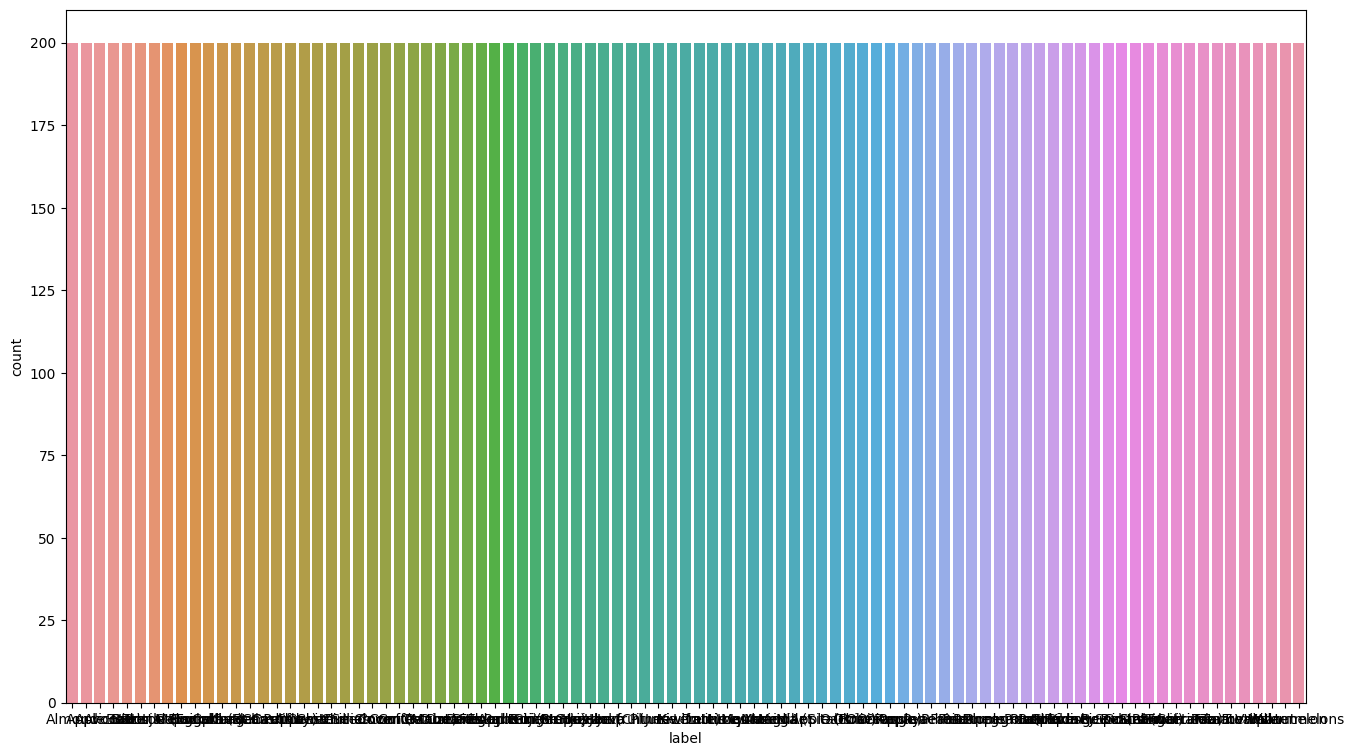

In [37]:
sns.set_palette('Set3')
plt.figure(figsize=(16,9))
sns.countplot(data=df,x = 'label')

In [38]:
df.shape

(18200, 9)

In [17]:
def handle_outliers_per_label(df, column):
    unique_labels = df['label'].unique()
    for label in unique_labels:
        label_data = df[df['label'] == label][column]
        q1 = label_data.quantile(0.25)
        q3 = label_data.quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr
        df.loc[(df['label'] == label) & ((df[column] > upper_limit) | (df[column] < lower_limit)), column] = np.NaN

columns_to_handle_outliers = ['ph', 'temperature', 'humidity', 'altitude', 'rainfall', 'N', 'P', 'K']
for col in columns_to_handle_outliers:
    handle_outliers_per_label(df, col)

# Dropping rows with NaN values after handling outliers per label
df.dropna(inplace=True)


In [18]:
df.shape

(18200, 9)

In [ ]:
df['label'].value_counts()

In [ ]:
sns.set_palette('Set3')
plt.figure(figsize=(16,9))
sns.countplot(data=df,x = 'label')

In [4]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Perform undersampling
X_resampled, y_resampled = undersampler.fit_resample(df.drop('label', axis=1), df['label'])

# Concatenate resampled features and labels
balanced_df = pd.DataFrame(X_resampled, columns=df.drop('label', axis=1).columns)
balanced_df['label'] = y_resampled

# Save the balanced data to a new CSV file
#balanced_df.to_csv('new_dataset.csv', index=False)


In [5]:
balanced_df['label'].value_counts()

label
Almond          200
Pomegranate     200
Pineapple       200
Peas            200
Peanut          200
               ... 
Currants        200
Cranberries     200
Cotton          200
Corn (Maize)    200
Watermelons     200
Name: count, Length: 91, dtype: int64

In [29]:
balanced_df.shape

(18200, 9)

In [7]:
import pandas as pd
import random

# Define the number of samples you want for each label
num_samples_per_label = 400

# Get unique labels
unique_labels = balanced_df['label'].unique()

# Initialize an empty list to store sampled data
new_data = []

# Iterate through each unique label
for label in unique_labels:
    # Filter the original dataset for the current label
    subset = balanced_df[balanced_df['label'] == label]
    
    # Randomly select 'num_samples_per_label' parameter values for each parameter
    for _ in range(num_samples_per_label):
        sampled_row = {'label': label}
        for param in balanced_df.columns:
            if param != 'label':  # Exclude 'label' column
                sampled_row[param] = random.choice(subset[param].values)
        new_data.append(sampled_row)

# Convert the new data list into a DataFrame
new_dataset = pd.DataFrame(new_data)

# Display the new dataset
print(new_dataset)

# Concatenate the original dataset and the new dataset
combined_dataset = pd.concat([balanced_df, new_dataset], axis=0)

# Reset index
combined_dataset.reset_index(drop=True, inplace=True)

# Store the combined dataset to a CSV file named 'fruits.csv'
combined_dataset.to_csv('fruits.csv', index=False)

# Confirm that the file is saved
print("Combined dataset saved to 'fruits.csv'")


             label    ph  temperature  humidity  altitude  rainfall    N   P   
0           Almond  6.93        29.70     61.76       940    718.38  106  20  \
1           Almond  6.61        21.32     50.46       329    547.85   31  47   
2           Almond  6.13        24.17     54.70      1087    845.14   56  25   
3           Almond  6.71        15.14     42.74       873    582.53   41  33   
4           Almond  6.22        22.47     56.36       156    518.22  110  40   
...            ...   ...          ...       ...       ...       ...  ...  ..   
36395  Watermelons  6.81        32.95     58.46       780   1461.91   85  32   
36396  Watermelons  6.98        32.47     63.80       512   1136.11  121  39   
36397  Watermelons  7.38        31.73     67.23       579   1187.57   90  30   
36398  Watermelons  6.43        32.39     65.20       594   1475.29  130  33   
36399  Watermelons  7.21        28.12     67.34       643   1069.78  115  25   

         K  
0       62  
1       62  


In [8]:
import pandas as pd
import numpy as np
import random

# Define the range for random modification ratio
min_modification_ratio = 0.2  # Minimum modification ratio
max_modification_ratio = 0.8  # Maximum modification ratio

# Define the range for random addition/subtraction
range_value = 5

# Initialize an empty list to store modified data
ok_data = []

# Iterate through each unique label
for label in combined_dataset['label'].unique():
    # Generate a random modification ratio for the current label
    modification_ratio = random.uniform(min_modification_ratio, max_modification_ratio)
    
    # Filter the dataset for the current label
    subset = combined_dataset[combined_dataset['label'] == label]
    
    # Get the minimum and maximum values of each parameter for the current label
    min_values = subset.drop('label', axis=1).min()
    max_values = subset.drop('label', axis=1).max()
    
    # Iterate through each row of the subset
    for index, row in subset.iterrows():
        # Initialize a dictionary to store modified values for the current row
        modified_row = {'label': label}
        
        # Iterate through each parameter within the subset
        for param in subset.columns[subset.columns != 'label']:
            # Convert the value to numeric if it's not already
            original_value = pd.to_numeric(row[param], errors='coerce')
            
            # If the original value is NaN or non-numeric, skip modification for this parameter
            if np.isnan(original_value):
                modified_row[param] = row[param]  # Insert original data
                continue
            
            # Check if the parameter should be modified based on the modification ratio
            if random.random() <= modification_ratio:
                # Generate a random value within the specified range (-5 to +5)
                random_value = random.uniform(-range_value, range_value)
                
                # Add or subtract the random value to the original parameter value
                modified_value = original_value + random_value
                
                # Ensure the modified value does not exceed the maximum or fall below the minimum
                modified_value = min(max_values[param], max(min_values[param], modified_value))
                
                # Round the modified value to two decimal places
                modified_value = round(modified_value, 2)
                
                # Update the value in the modified row dictionary
                modified_row[param] = modified_value
            else:
                modified_row[param] = row[param]  # Insert original data
        
        # Append the modified row to the ok_data list
        ok_data.append(modified_row)

# Convert the new data list into a DataFrame
ok_dataset = pd.DataFrame(ok_data)

# Concatenate the original dataset and the modified dataset
combined_dataset = pd.concat([combined_dataset, ok_dataset], ignore_index=True)

# Save the combined dataset to a new CSV file
combined_dataset.to_csv('combined_fruits.csv', index=False)

# Confirm that the file is saved
print("Combined dataset saved to 'combined_fruits.csv'")


Combined dataset saved to 'combined_fruits.csv'


In [9]:
import pandas as pd
import random

# Define the number of samples you want for each label
num_samples_per_label = 4800

# Get unique labels
unique_labels = combined_dataset['label'].unique()

# Initialize an empty list to store sampled data
new_data = []

# Iterate through each unique label
for label in unique_labels:
    # Filter the original dataset for the current label
    subset = combined_dataset[combined_dataset['label'] == label]
    
    # Randomly select 'num_samples_per_label' parameter values for each parameter
    for _ in range(num_samples_per_label):
        sampled_row = {'label': label}
        for param in combined_dataset.columns:
            if param != 'label':  # Exclude 'label' column
                sampled_row[param] = random.choice(subset[param].values)
        new_data.append(sampled_row)

# Convert the new data list into a DataFrame
new_dataset = pd.DataFrame(new_data)

# Display the new dataset
print(new_dataset)

# Concatenate the original dataset and the new dataset
xx_dataset = pd.concat([combined_dataset, new_dataset], axis=0)

# Reset index
xx_dataset.reset_index(drop=True, inplace=True)

# Store the combined dataset to a CSV file named 'fruits.csv'
xx_dataset.to_csv('xx.csv', index=False)

# Confirm that the file is saved
print("Combined dataset saved to 'fruits.csv'")


              label    ph  temperature  humidity  altitude  rainfall       N   
0            Almond  7.50        17.06     68.63    926.00    421.00  119.00  \
1            Almond  6.29        19.26     48.69   1457.00    421.00   47.00   
2            Almond  7.02        17.78     61.75   1433.79    576.42  103.77   
3            Almond  7.45        15.00     42.93    750.00    720.44   39.89   
4            Almond  7.50        27.29     42.78    424.96    782.17   37.72   
...             ...   ...          ...       ...       ...       ...     ...   
436795  Watermelons  7.11        31.04     53.49    201.00   1200.73  117.57   
436796  Watermelons  6.77        26.54     67.21    761.00   1371.09   86.00   
436797  Watermelons  6.00        26.73     61.79    296.00   1434.63  125.00   
436798  Watermelons  7.49        34.07     57.55    296.00   1199.82   90.00   
436799  Watermelons  7.30        28.95     56.27    257.00   1472.54   95.27   

            P       K  
0       28.69  